# Building  SGD 

## Importing functions

In [194]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

## Loading Data

In [195]:
X = load_boston().data
Y = load_boston().target

In [196]:
X.shape

(506, 13)

In [197]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

## Train-Test Split

In [198]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [199]:
type(X_train)

numpy.ndarray

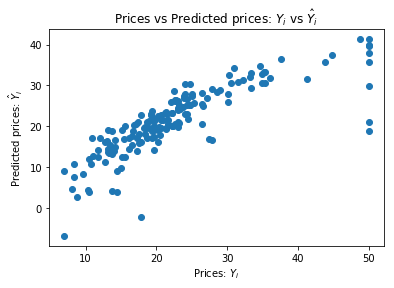

Mean Squared Error : 31.685954163046347


In [200]:
from sklearn.linear_model import LinearRegression

lm = SGDRegressor()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

print('Mean Squared Error :',mean_squared_error(Y_test, lm.predict(X_test)))


### Funtion to compute grad 

In [237]:
#code inspired from 100-page ML book
def compute_grad(train_data,learning_rate=0.01,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]))
    b_cur=0
    itr=1
    while(itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]))
        b_temp=0
        temp=X_train[np.random.choice(X_train.shape[0], 10, replace=False), :]  
        y=np.array(Y_train)
        x=np.array(X_train)
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur=w_old-learning_rate*w_temp
        b_cur=b_old-learning_rate*b_temp
        
        itr+=1
    return w_cur,b_cur
        
    

### Funtion to predict the values 

In [238]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

### Function to plot 

In [239]:
def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()        

In [240]:
 w,b=compute_grad(X_train)

In [241]:
b

array([17.4225765])

In [242]:
y_pred=predict(X_test,w,b)

In [243]:
len(y_pred)

167

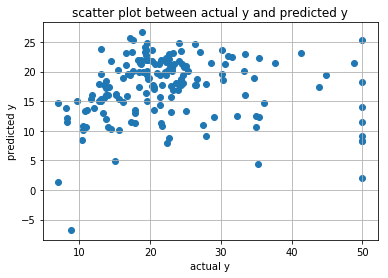

In [244]:
plot_(Y_test,y_pred)

In [245]:
print('Mean Squared Error :',mean_squared_error(Y_test, y1_pred_train))

Mean Squared Error : 215.6174342070751


### Pretty table 

In [222]:
from prettytable import PrettyTable

In [230]:
x = PrettyTable()

x.field_names  = ["Method","Mean Squared Value",'Weight Vector']
x.add_row(["SGD Classifier", 35.68,skw])
x.add_row(["Custom Functions", 215.61,w])

In [231]:
print(x)

+------------------+--------------------+---------------------------------------------------------------------------+
|      Method      | Mean Squared Value |                               Weight Vector                               |
+------------------+--------------------+---------------------------------------------------------------------------+
|  SGD Classifier  |       35.68        |  [-1.02904185  0.38773784 -0.4597413   0.234062   -0.4448657   3.28522483 |
|                  |                    |   -0.62833223 -1.82301944  0.87110846 -0.73451384 -1.94604838  1.08698439 |
|                  |                    |                                -3.1422523 ]                               |
| Custom Functions |       215.61       | [[-2.57692352 -2.59167305 -0.71883007 -2.46604127  0.31238689 -2.88770796 |
|                  |                    |     0.47716574  1.26682006  0.3370416   0.78550003 -2.16185324 -0.2399549 |
|                  |                    |               

### SGD comparision with actual values

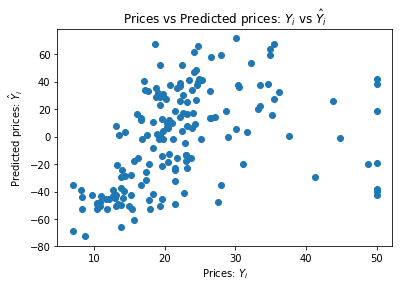

In [116]:
'''#prediction of my SGD
plt.scatter(Y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()'''

### SK-learn Linear Regression() comparision

In [ ]:
'''def function(X,w,b):
    func = w*X + b
    return func'''

In [179]:
'''def compute_loss1(X,Y,w,b):
    func  =np.dot(w,X.T)+b
    loss = (Y - func)**2
    
    total_loss = np.sum(loss)/X.shape[0]
    return total_loss'''

In [180]:
'''def compute_grad(X, y, w,b):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    
    # TODO<your code here>
    partial_deriv_w += np.dot(-2*X[i].T , (Y[:,i] - np.dot(X[i] , w) + b))
    partial_deriv_b += -2*(Y[:,i] - (np.dot(X[i] , w) + b))
    #-1*(y*(1-sigmoid) - sigmoid*(1+y))
    final_grad_w = np.sum(partial_deriv_w,axis = 1)/X.shape[0]
    final_grad_b = np.sum(partial_deriv_b,axis = 1)/X.shape[0]
    return final_grad_w,final_grad_b    '''

In [181]:
'''print(compute_loss1(np.array(X_train),np.array(Y_train),0.0,0.0))'''

7640.750766961652


In [182]:
'''np.random.seed(42)
w = np.random.randint(2, size=13)
b = np.random.randint(2, size=13)
r = 0.1

n_iter = 100
batch_size = 1
loss = np.zeros(n_iter)

for i in range(n_iter):
    ind = np.random.choice(X_train.shape[0], batch_size)
    loss[i] = compute_loss1(X_train, Y_train, w,b)
    if i % 10 == 0:
        visualize(X_train[ind, :], Y_train[ind], w, loss)

    # Keep in mind that compute_grad already does averaging over batch for you!
    # TODO:<your code here>
    gradw,gradb = compute_grad(X_train,Y_train,w,b)
    w = w+eta*gradw
    b = b+eta*gradb'''

ValueError: operands could not be broadcast together with shapes (339,) (13,) 

In [166]:
'''type(X_train)'''

numpy.ndarray